<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1 
# *Logistic Regression*

## Predicting Survival on the Titanic

The Titanic sank during her maiden voyage after colliding with an iceberg (April 15, 1912). Due to a commercial decision there were insufficient lifeboats, a fact that was partially responsible for the loss 1,502 out of 2,224 passengers and crew. 

The Titanic dataset incorporates many features of typical real-world problems: a mixture of continuous and discrete features, missing data, linear covariance, and an element of random chance. Predicting survival therefore involves many practical data science skills.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

### 1. Load Data

Load the `titanic.csv` file into a DataFrame named "titanic", with index column = `PassengerId`. Display the head of the DataFrame.

In [61]:
# ANSWER
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Why would we want to set an index column based on `PassengerId`?

ANSWER: This column is the key to training and testing our model. We use it to partition the dataset and to test the predictions of our model against known outcomes.

<a name="datadictionary"></a>
### 2. Data Dictionary 

If a data dictionary is available, it is handy to include it in the notebook for reference:

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### 2. EDA

Explore dataset. Find features to predict `Survived`. Get rid of null values. 

In [62]:
# ANSWER
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
df[df['Age'].isnull()] #find out which rows have null in age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [64]:
#Fill in null values
mean_age = df.Age.mean()
df.Age.replace(np.nan,mean_age, inplace= True) #inplace is to save the changes
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [65]:
df.info() # cabin is not an integer so cant use mean and median, but we can use mode
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [66]:
mode_cabin = df.Cabin.mode()
mode_cabin

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [67]:
df.Cabin.value_counts() #drop the column because it is scattered

df = df.drop(columns =['Cabin'])
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [68]:
#Embarked
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [69]:
embarked_mode = df.Embarked.mode()
embarked_mode
df.Embarked.replace(np.nan, 'S' )

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

### 3. Numerical Predictors Only

#### 3.1. Set Target and Features

To begin, let's try a model based on the passenger class (`Pclass`) and parents/children features (`Parch`):

In [70]:
# ANSWER

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [71]:
X=df[['Pclass', 'Parch']]
y=df['Survived']
X
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

#### 3.2 Partition

Partition the data into training and testing subsets:

- Use `random_state` = 1

In [72]:
# ANSWER
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

#### 3.3. Build Model

Prepare a model by creating an instance of the `LogisticRegression` class from the `sklearn.linear_model` library:

In [73]:
# ANSWER
# Create Model

lr = LogisticRegression(n_jobs=1)

Now train it on the training data subset, using the `fit` method of the model object (Nb. by default, `fit` will print the hyperparameters of the model):

In [74]:
# ANSWER
# Fit Model
lr.fit(X_train, y_train)

LogisticRegression(n_jobs=1)

In [75]:
lr.score(X,y) #the mode got % of the ans correct. it returns the mean accuracy on the given test and label

0.6846240179573513

In [76]:
#lr.predict_proba() # predict_proba will give the probability of getting the values

The computed coefficients are an array (`coef_`) stored in the 1st element of an array:

In [77]:
# ANSWER
coef = lr.coef_
coef

array([[-0.90824213,  0.33432156]])

The computed intercept (`intercept_`) is the 1st element of another array:

In [96]:
# ANSWER
intercept = lr.intercept_
intercept

array([1.40820621])

We can create tuples of the predictor names and coefficients like this:

In [97]:
# ANSWER
print(set(zip(y, str(lr.coef_[0]))))

{(1, '.'), (0, '['), (1, '3'), (1, '5'), (1, '6'), (1, '0'), (0, ']'), (0, '2'), (0, '8'), (0, '4'), (0, '9'), (0, '0'), (0, '3'), (0, ' '), (1, '-'), (1, '2'), (1, '4'), (1, '1')}


In [98]:
str(lr.coef_[0])

'[-0.90824213  0.33432156]'

If we want formatted output, here is a neat way to list the coefficients by predictor:

In [99]:
for col in zip(X_train.columns, lr.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

Age         -0.908242
Parch       +0.334322


In [100]:
X_test.shape


(179, 3)

In [101]:
y_test.shape

(179,)

This result implies that survival declines with passenger class (i.e. 1st class is highest) but increases with the number of parents or children in a group.

Let's see how well the model fit the training data. The `accuracy_score` is the proportion of correct predictions:

In [115]:
# ANSWER
from sklearn.metrics import accuracy_score
score = lr.score(X_test, y_test)
print(score)

0.5865921787709497


What is the  `accuracy_score` for the test data?

ANSWER


it is 65.36% which means that the model is 65.36% accurate in predicting 

What can we say aout this result?

ANSWER
- ...
- ...

Make a prediction on the test data

In [116]:
predictions = lr.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

#### 3.4. Add `AGE` as Feature

Let's include `Age` in the model. As we know from our EDA, this feature has many missing values. We don't want to throw away so many rows, so we will replace `NA` values with imputed values (e.g. the overall mean age):

In [117]:
# ANSWER
X_Age=df[['Pclass','Parch', 'Age']]
y=df['Survived']

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_Age, y, test_size=0.20, random_state=1)

# Build Model
lr = LogisticRegression(n_jobs=1)

# Fit Model
lr.fit(X_train, y_train)

# Score

score = lr.score(X_test, y_test)
score

0.664804469273743

So, including age did little to reduce the variance in our model. Why might this be?

ANSWER

- ...
- ...
- ...

Let's see where the model is going wrong by showing the Confusion Matrix:

In [119]:
# ANSWER
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics


logisticRegr = LogisticRegression()

logisticRegr.fit(X_train, y_train)

y_pred_class = logisticRegr.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred_class))

[[88 18]
 [42 31]]


Nb. Here is how `confusion_matrix` arranges its output:

In [120]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


Which type of error is more prevalent?

ANSWER: ...

Maybe we aren't using the right cut-off value. By default, we are predicting that `Survival` = True if the probability >= 0.5, but we could use a different threshold. The ROC curve helps us decide (as well as showing us how good our predictive model really is):

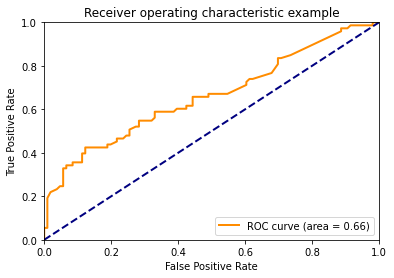

In [121]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logisticRegr.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

### 4. Including Categorical Predictors

So far, we've only used numerical features for prediction. Let's convert the character features to dummy variables so we can include them in the model:

In [122]:
titanic_with_dummies = pd.get_dummies(data = df, columns = ['Sex', 'Embarked', 'Pclass'], 
                                      prefix = ['Sex', 'Embarked', 'Pclass'] )
titanic_with_dummies.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1,0,0,1


So, this created a column for every possible value of every categorical variable. (A more compact approach would have been to reduce the number of dummy variables by one for each feature, so that the first vriable from each captures two possible states.)

Now that we have data on sex, embarkation port, and passenger class we can try to improve our `Age` imputation by stratifying it by the means of groups within the passenger population:

In [123]:
titanic_with_dummies['Age'] = titanic_with_dummies[["Age", "Parch", "Sex_male", "Pclass_1", "Pclass_2"]].groupby(["Parch", "Sex_male", "Pclass_1", "Pclass_2"])["Age"].transform(lambda x: x.fillna(x.mean()))
titanic_with_dummies['Age']









0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

Now train the model using the expanded set of predictors and compute the accuracy score for the test set:

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

# Set Feature Both Numerical, Categorical
X = titanic_with_dummies[['Age','Parch','Pclass_1']]
y = titanic_with_dummies['Survived']

# Partition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Build the Model

logisticRegr = LogisticRegression()

logisticRegr.fit(X_train, y_train)

y_pred_class = logisticRegr.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred_class))

# Accuracy Score

from sklearn.metrics import accuracy_score
score = lr.score(X_test, y_test)
print(score)



[[91 15]
 [44 29]]
0.5865921787709497


Plot the ROC curve for the new model:

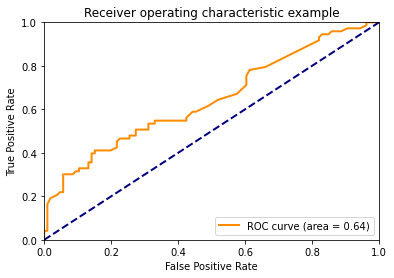

In [125]:
# ANSWER

# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logisticRegr.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()


Can we improve the model by including the remaining features?

Yes because the ROC line is not close to the linear regression line

## Homework

1. Remove the `random_state` parameter (if you have used), so that the data partition will be different every time, and run through the final modelling process a few times. Do the results change?


In [196]:
X = titanic_with_dummies[['Age','Parch','Pclass_1']]
y = titanic_with_dummies['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

logisticRegr = LogisticRegression()

logisticRegr.fit(X_train, y_train)

y_pred_class = logisticRegr.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred_class))

score = logisticRegr.score(X_test, y_test)
print(score)

[[93 11]
 [54 21]]
0.6368715083798883


The accuracy score seems to hover between the ranges of 69% and 73%

2. Use cross-validation to assess the quality of the model when overfitting is controlled. Does the accuracy improve?

In [212]:
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error

X = titanic_with_dummies[['Age','Parch','Pclass_1']]
y = titanic_with_dummies['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


import pandas as pd

logisticRegr= LogisticRegression()

k_fold = KFold(5, shuffle=True) #so there are 4 folds for training set and 1 fold for test set
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
    
    # Get training and test sets for X and y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    
    
    
    # Fit model with training set

    logisticRegr.fit(X_train, y_train)
    
    # Make predictions with training and test set
    
# Predictions with test set

    y_pred_test_data = logisticRegr.predict(X_test)

    # Score R2 and RMSE on training and test sets and store in list

# R2     
    r_sq_test = logisticRegr.score(X_test,y_test)  
    test_scores.append(r_sq_test)
    r_sq_train =logisticRegr.score(X_train,y_train)
    train_scores.append(r_sq_train)

# MSE

    #MSE_test = mean_squared_error(X_test,y_test)
    #test_rmse.append(MSE_test)

    #MSE_train = mean_squared_error(X_train,y_train)
    #train_rmse.append(MSE_train)

# Create a metrics_df dataframe to display r2 and rmse scores
 
    combined = {'r-square': [train_scores, test_scores], 'mse': [train_rmse, test_rmse]}

metrics_df= pd.DataFrame(combined, index = ['training data','test data'])  
metrics_df

,r-square,mse
training data,"[0.6867977528089888, 0.6867977528089888, 0.693...",[]
test data,"[0.6759776536312849, 0.6983240223463687, 0.664...",[]


3. Look at the `fpr` & `tpr` vectors for the best model.

***FPR and TPR***

- Measures general performance of the ROC curve which consists of the TPR and FPR through various probability thresholds
- Measures the ability to distinguish between the classes.

***False Positive Rate (FPR)*** 

- Describes the rate of false alarms

- Measures the ratio of false positives within the negative samples.

Formula:

FPR (False Positive Rate) = # False Positives / # negatives = FP / (FP+TN)



***True Positive Rate (TPR)*** 

Formula:

TPR (True Positive Rate) = # True positives / # positives = Recall = TP / (TP+FN)

***Precision***

- Measures the probability of correct detection of positive values
- Better with large number of negative samples

Formula:

Precision =# True positives / # predicted positive = TP/(TP+FP)

***Recall***

Formula:

Recall = # True positives / # positives = TP / (TP+FN)

*Recall and TPR are the same thing*

***(1) Calculated on my own***

In [219]:
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score, recall_score, roc_curve

logisticRegr= LogisticRegression()

logisticRegr.fit(X_train, y_train)

y_pred_class = logisticRegr.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_class)

fpr

array([0.       , 0.0952381, 1.       ])

In [220]:
tpr

array([0.        , 0.45945946, 1.        ])

***(2) From graph above***

In [221]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_class)

In [222]:
fpr

array([0.       , 0.0952381, 1.       ])

In [223]:
tpr

array([0.        , 0.45945946, 1.        ])

Extra Notes from Towards Data Science


- ***Use precision and recall to focus on small positive class*** 
  
  When the positive class is smaller and the ability to detect correctly positive samples is our main focus (correct detection of negatives examples is less important to the problem) we should use precision and recall.


- ***Use ROC when both classes detection is equally important*** — When we want to give equal weight to both classes prediction ability we should look at the ROC curve.


- ***Use ROC when the positives are the majority or switch the labels and use precision and recall*** — When the positive class is larger we should probably use the ROC metrics because the precision and recall would reflect mostly the ability of prediction of the positive class and not the negative class which will naturally be harder to detect due to the smaller number of samples. If the negative class (the minority in this case) is more important, we can switch the labels and use precision and recall (As we saw in the examples above — switching the labels can change everything).



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



